In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# default_path = "../lab10/raw_data/"
# app_train = pd.read_csv(default_path+"application_train.csv")

bureau_balance = pd.read_csv('../../pjt2/raw_data/bureau_balance.csv') # 로컬 경로

In [2]:
def check_feature(datasets, feature):
    print("=" * 20, "describe", "=" * 20)
    try:
        print(datasets[feature].describe())
    except:
        print("can't describe. dtype is", datasets[feature].dtype)
    print("=" * 50)
    
    print("=" * 20, "unique", "=" * 20)
    print(datasets[feature].unique())
    print("=" * 50)

    print("=" * 20, "value_counts", "=" * 20)
    print(datasets[feature].value_counts())
    print("=" * 50)

    print("=" * 20, "isna", "=" * 20)
    print(datasets[feature].isna().value_counts())
    print("=" * 50)
    
    return None

In [3]:
bureau_balance_df = pd.DataFrame(bureau_balance)
bureau_balance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [4]:
bureau_balance_df

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [5]:
bureau_balance_df.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [6]:
check_feature(bureau_balance_df, 'STATUS')

==================== describe ====================
count     27299925
unique           8
top              C
freq      13646993
Name: STATUS, dtype: object
==================== unique ====================
['C' '0' 'X' '1' '2' '3' '5' '4']
==================== value_counts ====================
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64
==================== isna ====================
False    27299925
Name: STATUS, dtype: int64


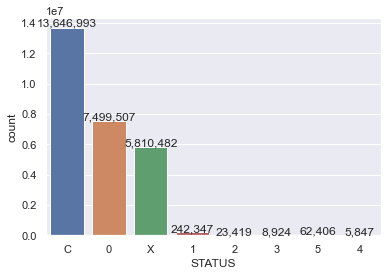

In [8]:
sns.set_theme(style="darkgrid")

ax = sns.countplot(x="STATUS", data=bureau_balance_df)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("{0:,}".format(int(height)), (left+width/2, height*1.01), ha='center')

In [7]:
bureau_balance_df

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [8]:
# STATUS 값 숫자 변환

bureau_balance_df['STATUS'] = bureau_balance_df['STATUS'].replace(['C', 'X', '0', '1', '2', '3', '4', '5'], [0,0,0,1,2,3,4,5])
bureau_balance_df['STATUS'] = pd.to_numeric(bureau_balance_df['STATUS'])

In [9]:
check_feature(bureau_balance_df, 'STATUS')

==================== describe ====================
count    2.729992e+07
mean     2.385996e-02
std      2.743293e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+00
Name: STATUS, dtype: float64
==================== unique ====================
[0 1 2 3 5 4]
==================== value_counts ====================
0    26956982
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64
==================== isna ====================
False    27299925
Name: STATUS, dtype: int64


In [10]:
bureau_balance_df.dtypes

SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            int64
dtype: object

In [11]:
bureau_balance_df = bureau_balance_df.groupby('SK_ID_BUREAU')[['STATUS']].sum()

In [12]:
bureau_balance_df

,STATUS
SK_ID_BUREAU,
5001709,0
5001710,0
5001711,0
5001712,0
5001713,0
...,...
6842884,0
6842885,60
6842886,0


In [13]:
bureau_balance_df.to_csv("../../pjt2/raw_data/bureau_balance_df.csv", mode='w')